In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') #стиль графика
%matplotlib inline


In [ ]:
#ноомальное распределение
#генератор
norm_rv = stats.norm(loc = 0, scale = 1)

In [ ]:
sample = norm_rv.rvs(1000)
sample[:10]

array([ 0.53884168,  0.5320091 , -2.01318809, -0.16215038,  0.54682848,
       -1.09301593, -1.07942821,  0.13872444,  1.4111082 ,  1.06550548])

In [ ]:
#узнаем плотность в 1
norm_rv.pdf(1)

0.24197072451914337

In [ ]:
x = np.linspace(-3,3, 100)
pdf = norm_rv.pdf(x)

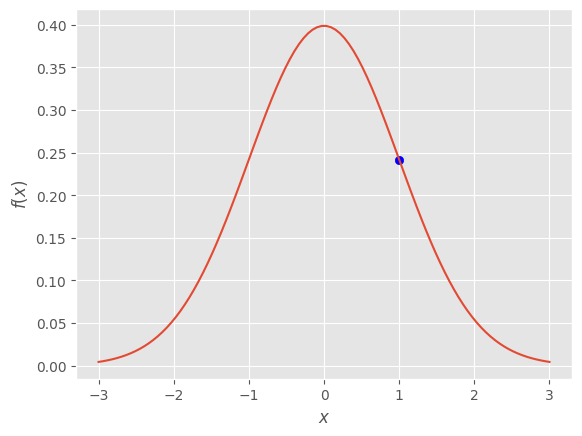

In [ ]:
plt.plot(x,pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([1], [norm_rv.pdf(1)], color = 'blue')
plt.show()

In [ ]:
norm_rv.cdf(1)#вероятность, что величина меньше 1

0.8413447460685429

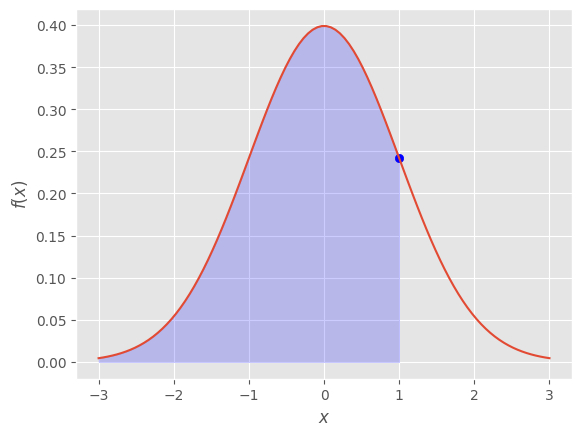

In [ ]:
plt.plot(x,pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([1], [norm_rv.pdf(1)], color = 'blue')


xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color = 'blue', alpha = 0.2)
plt.show()

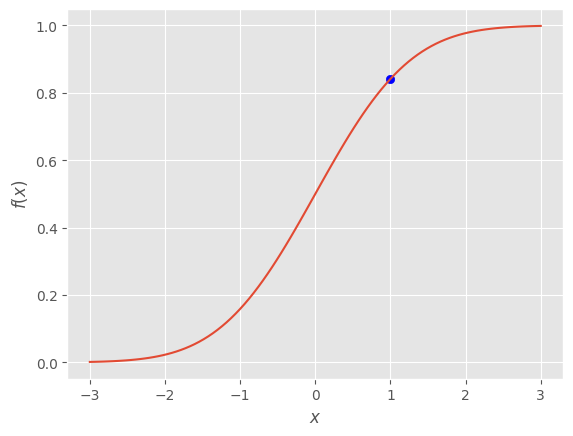

In [ ]:
x = np.linspace(-3,3, 100)
cdf = norm_rv.cdf(x)
plt.plot(x,cdf )
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([1], [norm_rv.cdf(1)], color = 'blue')
plt.show()

In [ ]:
#квантиль
q = norm_rv.ppf(0.1)

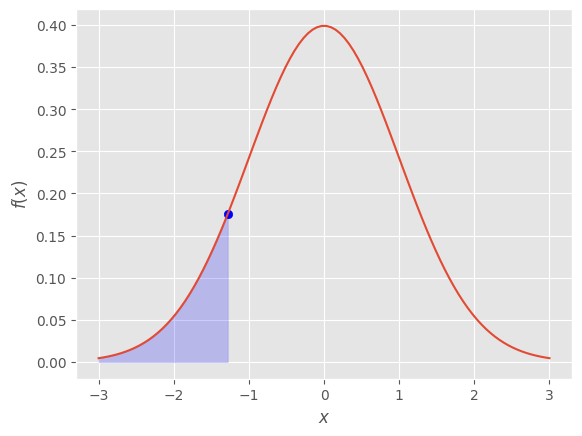

In [ ]:
plt.plot(x,pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([q], [norm_rv.pdf(q)], color = 'blue')


xq = np.linspace(-3, q, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color = 'blue', alpha = 0.2)
plt.show()

In [ ]:
np.mean(sample) #выборочное среднее (похоже на мат ожидание)

-0.01717369733090277

In [ ]:
np.var(sample)

1.0287672141996695

In [ ]:
np.median(sample)

-0.04385059792688317

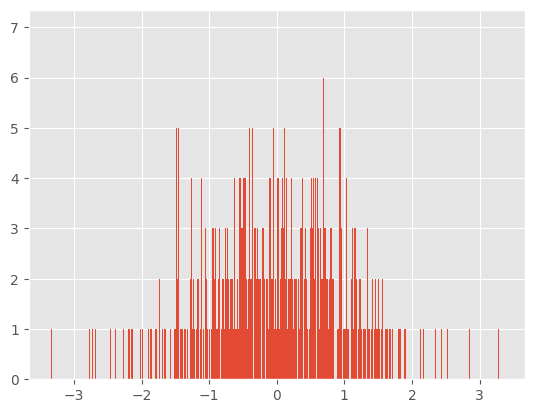

In [ ]:
plt.hist(sample, bins = 1000)
plt.show()

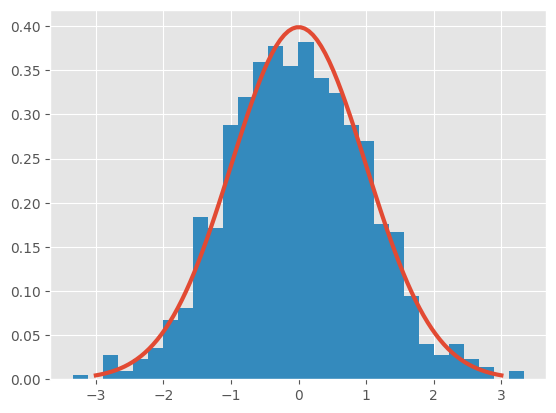

In [ ]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf, lw = 3)
plt.hist(sample, bins = 30, density = True)
plt.show()

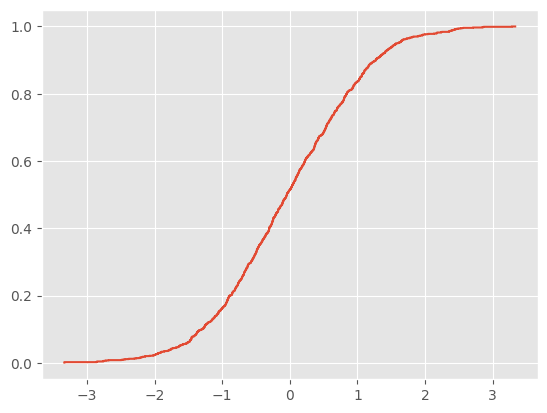

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
#эмпирическая функция по выборке
ecdf = ECDF(sample)
plt.step(ecdf.x,ecdf.y)

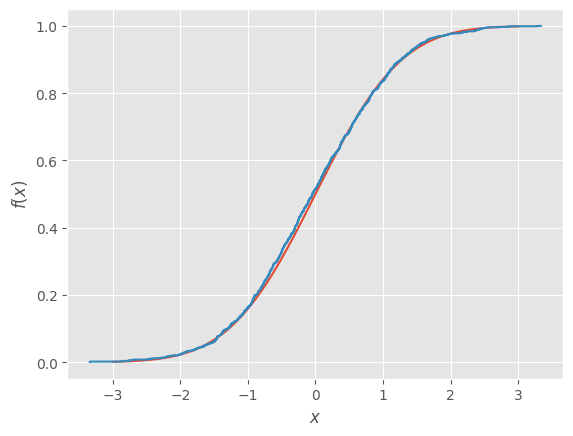

In [ ]:
x = np.linspace(-3,3, 100)
cdf = norm_rv.cdf(x)
plt.plot(x,cdf )
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
from statsmodels.distributions.empirical_distribution import ECDF
#эмпирическая функция по выборке
ecdf = ECDF(sample)
plt.step(ecdf.x,ecdf.y)


In [ ]:
np.random.choice(np.arange(1,11), size = 5, replace = False)

array([8, 7, 2, 1, 5])

In [ ]:
np.random.choice([1,2,3,4], size = 5,  p = [0.5,0.3,0.1, 0.1]) #с вероятностями

array([3, 1, 1, 1, 2])

In [ ]:
stats.norm(loc = 3, scale = 2).rvs(5, random_state = 42) #зафиксировали

array([3.99342831, 2.7234714 , 4.29537708, 6.04605971, 2.53169325])

In [ ]:
df = pd.read_csv("healthcare_dataset.csv")

In [ ]:

df.columns = df.columns.str.replace(' ', '')




In [ ]:
df.head()

,Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,InsuranceProvider,BillingAmount,RoomNumber,AdmissionType,DischargeDate,Medication,TestResults
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
df.shape

(55500, 15)

In [ ]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
BloodType,object
MedicalCondition,object
DateofAdmission,object
Doctor,object
Hospital,object
InsuranceProvider,object
BillingAmount,float64


In [ ]:
mx = df.BillingAmount.max()

In [ ]:
df[df.BillingAmount == mx]

,Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,InsuranceProvider,BillingAmount,RoomNumber,AdmissionType,DischargeDate,Medication,TestResults
36349,tOdd CARrILlO,51,Female,A+,Hypertension,2023-09-08,Kathleen Griffin,Griffin Group,Blue Cross,52764.276736,209,Elective,2023-10-04,Ibuprofen,Normal


<Axes: >

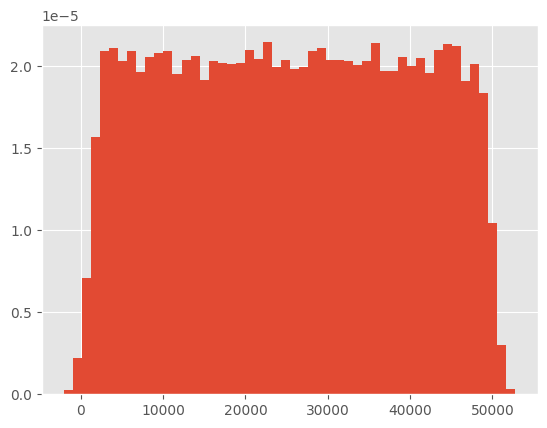

In [ ]:
df.BillingAmount.hist(bins = 50, density = True)

In [ ]:
df.describe()

,Age,BillingAmount,RoomNumber
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
df[df.BloodType == 'B-'].BillingAmount.mean()

25524.424636082644

In [ ]:
df.groupby('BloodType').BillingAmount.mean()

,BillingAmount
BloodType,
A+,25664.566404
A-,25595.024701
AB+,25361.458784
AB-,25694.933091
B+,25429.723237
B-,25524.424636
O+,25249.740696
O-,25795.657833


In [ ]:
df.groupby('BloodType').BillingAmount.agg(['mean', 'max'])

,mean,max
BloodType,,
A+,25664.566404,52764.276736
A-,25595.024701,52170.036854
AB+,25361.458784,52373.032374
AB-,25694.933091,52271.663747
B+,25429.723237,52181.837792
B-,25524.424636,52092.669896
O+,25249.740696,52211.852966
O-,25795.657833,52024.726443


<Axes: >

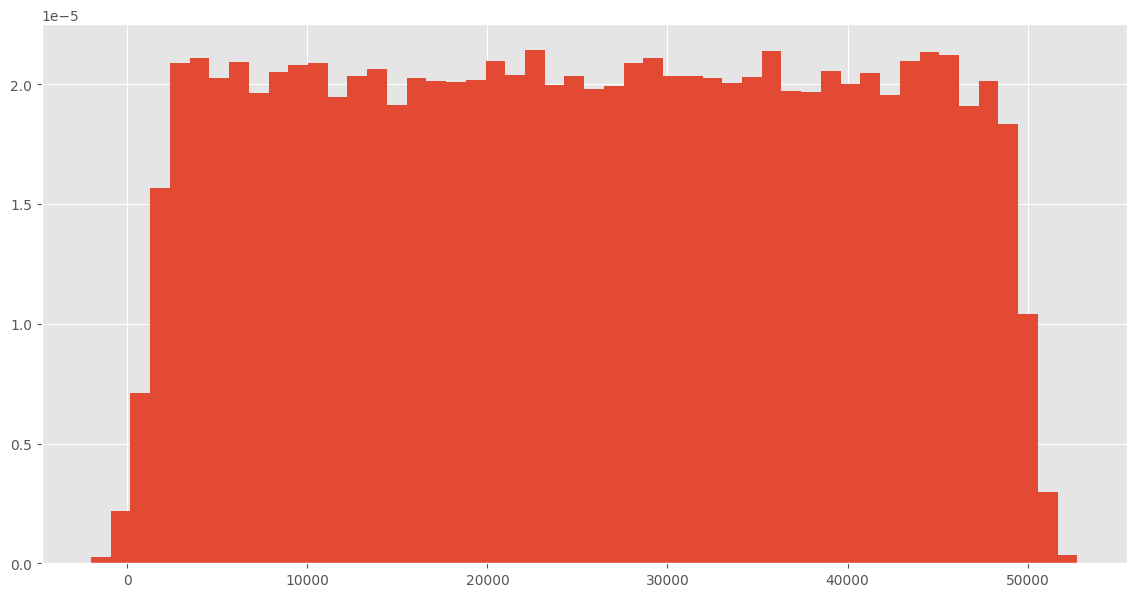

In [ ]:
plt.figure(figsize = (14, 7))
df.BillingAmount.hist(bins = 50, density = True)


In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['top_pct'] = 100 * df['tip'] / df['total_bill']

зависисмоть всех переменных от пола человека

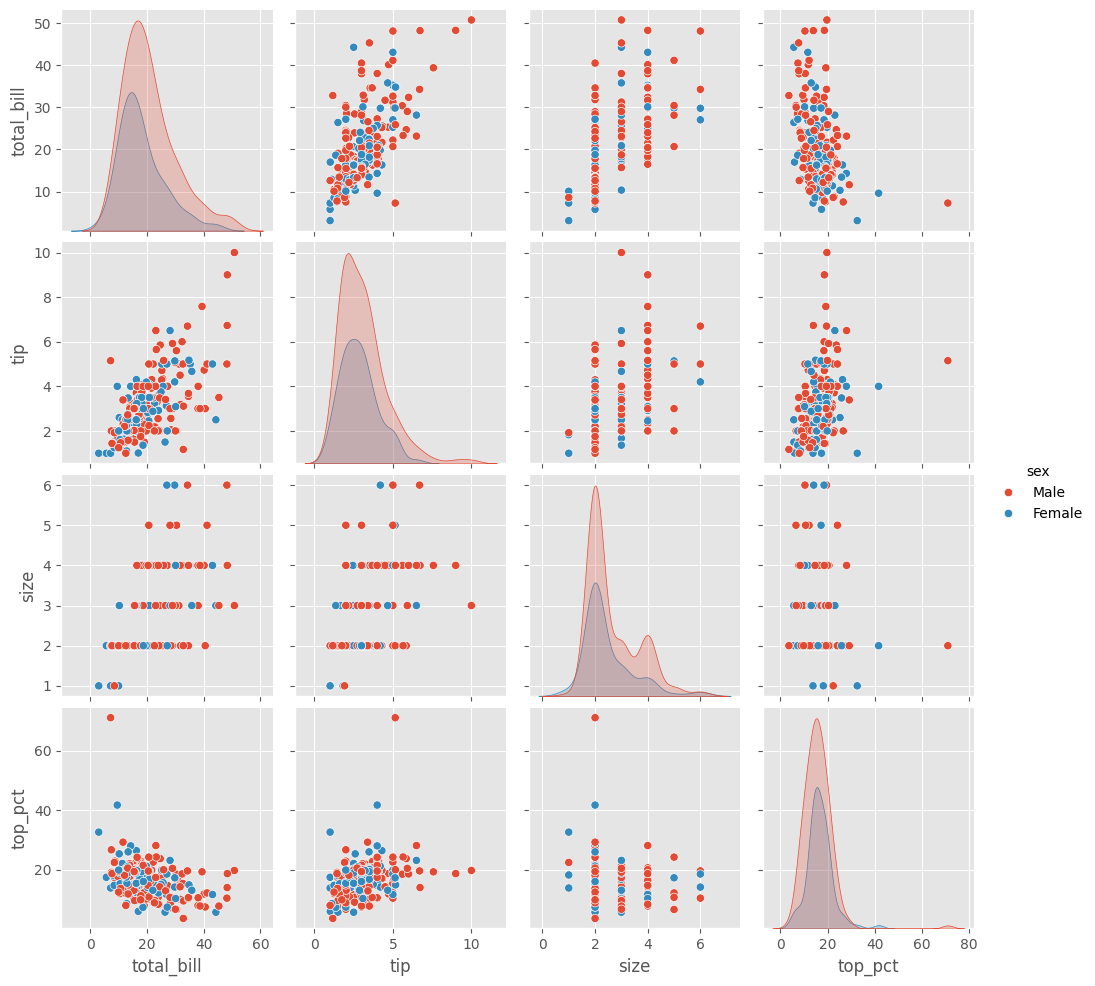

In [ ]:
sns.pairplot(df, hue = 'sex' , height = 2.5, kind = 'scatter')

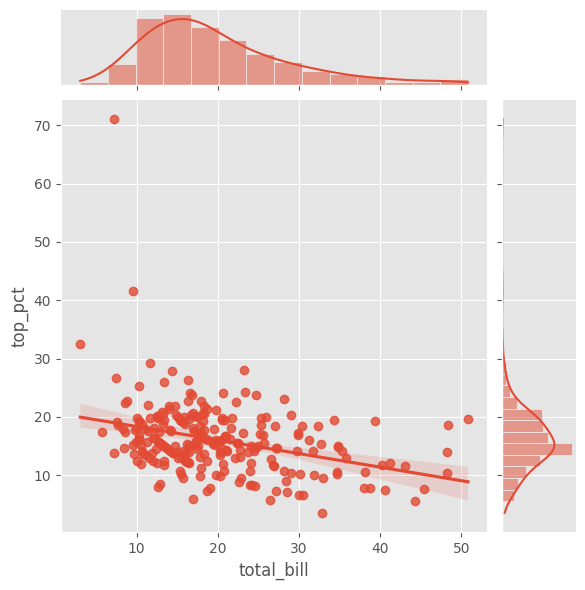

In [ ]:
sns.jointplot(x="total_bill", y="top_pct", data=df, kind = 'reg')


In [ ]:
df1 = df[['total_bill', 'tip','size', 'top_pct']]
corr_matrix = df1.corr(method='pearson')
print(corr_matrix)


            total_bill       tip      size   top_pct
total_bill    1.000000  0.675734  0.598315 -0.338624
tip           0.675734  1.000000  0.489299  0.342370
size          0.598315  0.489299  1.000000 -0.142860
top_pct      -0.338624  0.342370 -0.142860  1.000000


In [ ]:
corr_matrix = df1.corr(method='spearman')
print(corr_matrix)

            total_bill       tip      size   top_pct
total_bill    1.000000  0.678968  0.604791 -0.320680
tip           0.678968  1.000000  0.468268  0.396186
size          0.604791  0.468268  1.000000 -0.152211
top_pct      -0.320680  0.396186 -0.152211  1.000000


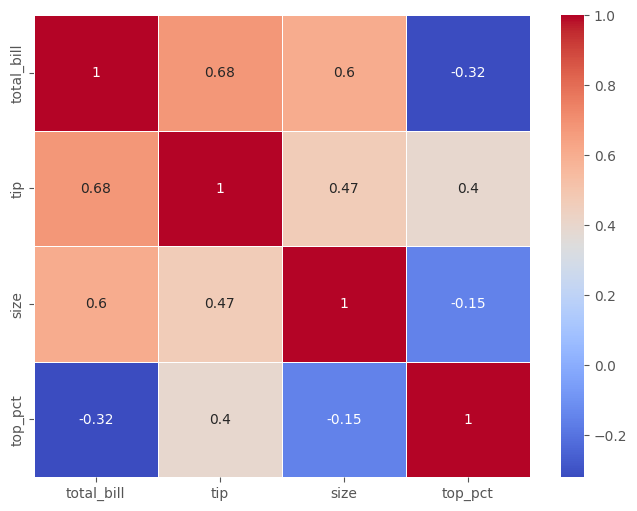

In [ ]:

plt.figure(figsize=(8, 6))  # Устанавливаем размер графика
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()


**Парсинг**

In [ ]:
from requests import get

import time

In [ ]:
page_link = 'https://knowyourmeme.com'
response = get(page_link)
response

<Response [200]>

In [ ]:
response.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [ ]:
!pip install fake_useragent



In [ ]:
from fake_useragent import UserAgent

In [ ]:
UserAgent().chrome

'Mozilla/5.0 (Linux; Android 11; moto e20 Build/RONS31.267-94-14) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.6261.64 Mobile Safari/537.36'

In [ ]:
response = get(page_link, headers = {'User-Agent': UserAgent().chrome})
response

<Response [200]>

In [ ]:
html = response.content
html[ :1000]

b"<!DOCTYPE html>\n<html xmlns:fb='https://www.facebook.com/2008/fbml' xmlns='https://www.w3.org/1999/xhtml'>\n<head>\n<meta content='width=1060' name='viewport'>\n<meta content='text/html; charset=utf-8' http-equiv='Content-Type'>\n\n<meta property='og:title' content='Know Your Meme' />\n<meta property='og:site_name' content='Know Your Meme' />\n<meta property='og:image' content='https://a.kym-cdn.com/assets/kym-logo-large-2be3f3818691470a0369e154647ca0f0.png' />\n<meta property='og:type' content='article' />\n<meta property='fb:app_id' content='104675392961482' />\n<meta property='fb:pages' content='88519108736' />\n<meta property='article:publisher' content='https://www.facebook.com/knowyourmeme' />\n<meta name='twitter:card' content='summary_large_image' />\n<meta name='twitter:site' content='@knowyourmeme' />\n<meta name='twitter:creator' content='@knowyourmeme' />\n<meta name='twitter:title' content='Know Your Meme' />\n<meta name='twitter:description' content='Know Your Meme' />

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html xmlns="https://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml">
<head>
<meta content="width=1060" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Know Your Meme" property="og:title">
<meta content="Know Your Meme" property="og:site_name">
<meta content="https://a.kym-cdn.com/assets/kym-logo-large-2be3f3818691470a0369e154647ca0f0.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="104675392961482" property="fb:app_id"/>
<meta content="88519108736" property="fb:pages"/>
<meta content="https://www.facebook.com/knowyourmeme" property="article:publisher"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@knowyourmeme" name="twitter:site"/>
<meta content="@knowyourmeme" name="twitter:creator"/>
<meta content="Know Your Meme" name="twitter:title"/>
<meta content="Know Your Meme" name="twitter:description"/>
<meta content="https://a.kym-c

In [ ]:
soup.html

<html xmlns="https://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml">
<head>
<meta content="width=1060" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Know Your Meme" property="og:title">
<meta content="Know Your Meme" property="og:site_name">
<meta content="https://a.kym-cdn.com/assets/kym-logo-large-2be3f3818691470a0369e154647ca0f0.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="104675392961482" property="fb:app_id"/>
<meta content="88519108736" property="fb:pages"/>
<meta content="https://www.facebook.com/knowyourmeme" property="article:publisher"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@knowyourmeme" name="twitter:site"/>
<meta content="@knowyourmeme" name="twitter:creator"/>
<meta content="Know Your Meme" name="twitter:title"/>
<meta content="Know Your Meme" name="twitter:description"/>
<meta content="https://a.kym-cdn.com/assets/kym

In [ ]:
soup.html.head.title.text

'Internet Meme Database | Know Your Meme'

In [ ]:
x = soup.find_all('a', {'class': 'newsfeed-title'})
[item.text for item in x]

["On This Day In 2016, The Facebook Page 'Moldy Memes' Made Its First Post",
 "You Simply Won't Regret Buying One Carrot",
 'Oshiete yo! Tokyo Ghoul Began Serialization On This Day 13 Years Ago',
 "14 Years Ago, 'Ben Drowned' Began Terrifying Gamers Everywhere",
 'Daily Reminder That You Can Always Get Some Infinite Chocolate ']

In [ ]:
x = soup.find('a', {'class': 'newsfeed-title'})
x.get("href")


'/memes/moldy-memes'

In [ ]:
x = soup.find_all('a', {'class': 'newsfeed-title'})

meme_links = [item.get("href") for item in x]
meme_links[:3]


['/memes/moldy-memes',
 '/photos/2897677-concord',
 '/memes/subcultures/tokyo-ghoul']

In [ ]:
def getPageLinks(page_number):
  page_link = 'https://knowyourmeme.com/page/{}'.format(page_number)
  response = get(page_link, headers = {'User-Agent': UserAgent().chrome})
  if not response.ok:
    return []
  html = response.content
  soup = BeautifulSoup(html, 'html.parser')

  meme_links = soup.find_all('a', {'class': 'newsfeed-title'})

  meme_links = [ 'https://knowyourmeme.com' + link.get("href") for link in meme_links]
  return meme_links

In [ ]:
meme_links = getPageLinks(44)
meme_links

['https://knowyourmeme.com/memes/bakutoe',
 'https://knowyourmeme.com/memes/twin-got-put-on-his-back-his-shooeeee',
 'https://knowyourmeme.com/memes/events/nux-taku-jaiden-animations-parasocial-relationship-accusations',
 'https://knowyourmeme.comhttps://trending.knowyourmeme.com/editorials/collections/25-artists-who-definitely-shouldnt-make-more-masterpieces',
 'https://knowyourmeme.com/memes/subcultures/sonic-the-hedgehog-3-2024-film']

In [ ]:
meme_page = 'https://knowyourmeme.com/memes/doge'
response = get(meme_page, headers = {'User-Agent': UserAgent().chrome})

html = response.content
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
def getStats(soup, stats):
  try:
    obj = soup.find('dd', attrs = {"class": stats})
    obj = obj.find('a').text
    obj = int(obj.replace(',', ''))
  except:
    obj = None
  return obj


In [ ]:
views = getStats(soup, stats = 'views')
print(views)
videos = getStats(soup, stats = 'videos')
print(videos)
videos = getStats(soup, stats = 'videos')
print(videos)
photos = getStats(soup, stats = 'photos')
print(photos)

14238000
106
106
1803
